<a href="https://colab.research.google.com/github/RIZKYANGKATA/PCVK/blob/main/Pertemuan5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama Kelompok :
- Alwan Alawi (09)
- Rizky Angkata P. S. (25)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

TUGAS PRAKTIKUM

 1. Buat Gamma Correction sesuai dengan petunjuk

 Gamma Correction pada Citra 
----------------------------------
Masukkan nilai Gamma: 50


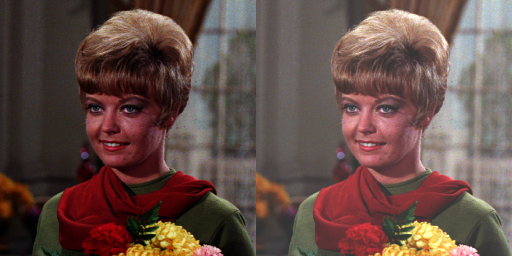

In [ ]:


print(' Gamma Correction pada Citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
gamma_img = np.zeros(original.shape, original.dtype)

gamma_img = cv.convertScaleAbs(original, beta=gamma)   # alpha untuk mengontrol faktor scalling

final_frame = cv.hconcat((original, gamma_img))
cv2_imshow(final_frame)

# final_frame2 = np.hstack((original, gamma_img))
# cv2_imshow(final_frame2)

 2. Buat Simulasi Image Depth

 Simulasi Image Depth pada Citra 
----------------------------------
Masukkan nilai Depth: 1


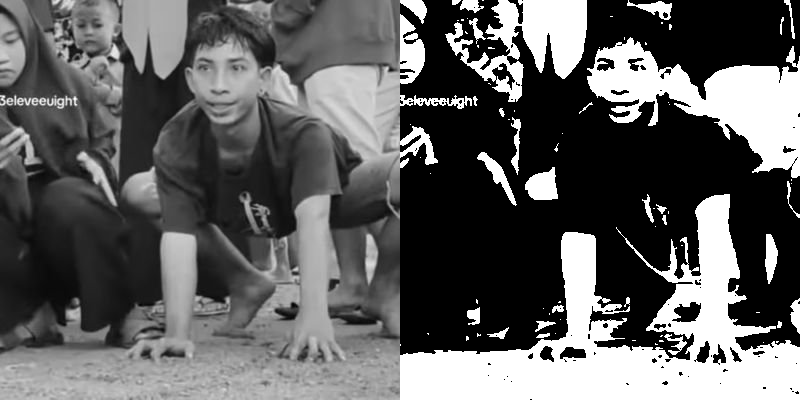

In [ ]:


print(' Simulasi Image Depth pada Citra ')
print('----------------------------------')
try:
  bit_depth = int(input('Masukkan nilai Depth: '))
except ValueError:
  print('Error, not a number')

level = 255 / (pow(2,bit_depth)-1)

original = cv.imread('/content/drive/MyDrive/PCVK/Images/gogonT.jpg', cv.IMREAD_GRAYSCALE)
depth_img = np.zeros(original.shape, original.dtype)

# melakukan akses setiap piksel pada grayscale
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_img[y,x] = np.clip(round(original[y,x] / level)*level,0,255)

final_frame = cv.hconcat((original, depth_img))
cv2_imshow(final_frame)

Cara ke-2

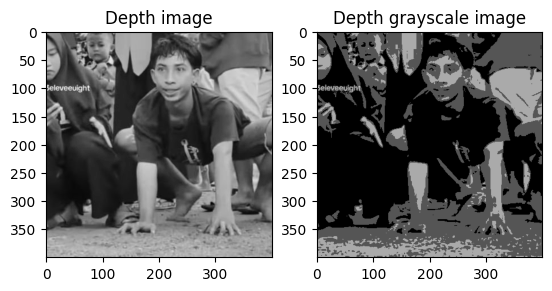

In [ ]:
bit_depth = 2
levels = 255 / (pow(2,bit_depth)-1)

original = cv.imread('/content/drive/MyDrive/PCVK/Images/gogonT.jpg', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, dtype=np.uint8)

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        pixel_value = original[y, x]
        new_pixel_value = int(pixel_value / levels) * levels
        depth_image[y, x] = new_pixel_value

# Konversi depth_image ke citra grayscale dengan bit depth yang telah dikurangi
depth_grayscale = depth_image

# Display depth and grayscale image:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(original, cmap="gray")
axs[0].set_title('Depth image')
axs[1].imshow(depth_grayscale, cmap="gray")
axs[1].set_title('Depth grayscale image')
plt.show()

3. Buat modul Average Denoising

Jumlah Citra 5

Nilai PSNR dengan 5 citra :  100  dB


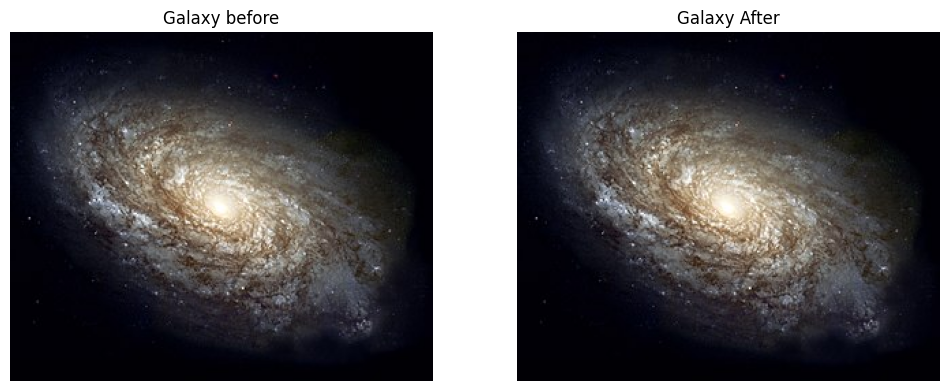

In [32]:


import glob
import cv2
from math import sqrt, log10

def PSNR(img1, img2):
  mse = np.mean((img1-img2)**2)
  if(mse==0):
    return 100
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr

# membaca citra asli
original_img = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')

# membaca semua citra yang tersimpan dalam satu folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

denoised_img = np.zeros(cv_img[0].shape)
jmlGambar = 1
for i in range(jmlGambar):
  denoised_img = denoised_img + cv_img[i]
denoised_img = np.uint16(denoised_img/jmlGambar)

psnr = PSNR(original_img,denoised_img)

print('Nilai PSNR dengan 5 citra : ', psnr, ' dB')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv_img[0], cv2.COLOR_BGR2RGB))
plt.title('Galaxy before')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
plt.title('Galaxy After')
plt.axis('off')

plt.show()


Jumlah Citra 10

Nilai PSNR dengan 10 citra :  100  dB


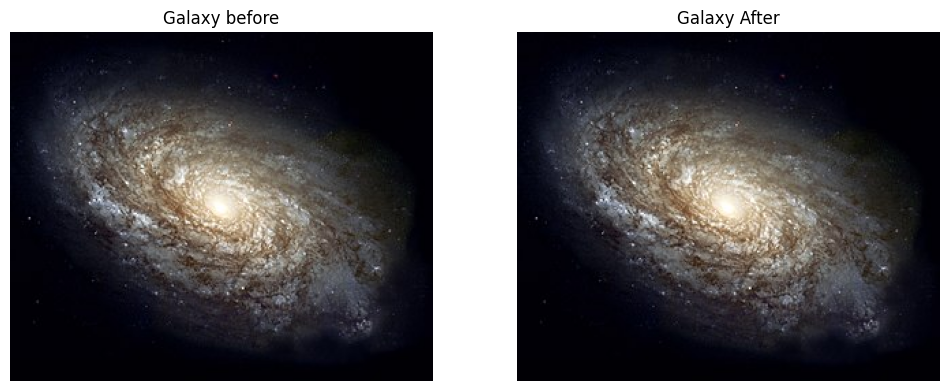

In [35]:
# membaca citra asli
original_img = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')

# membaca semua citra yang tersimpan dalam satu folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

denoised_img = np.zeros(cv_img[0].shape)
jmlGambar = 10
for i in range(jmlGambar):
  denoised_img = denoised_img + cv_img[i]
denoised_img = np.uint16(denoised_img/jmlGambar)

psnr = PSNR(original_img,denoised_img)

print('Nilai PSNR dengan 10 citra : ', psnr, ' dB')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv_img[0], cv2.COLOR_BGR2RGB))
plt.title('Galaxy before')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
plt.title('Galaxy After')
plt.axis('off')

plt.show()

Jumlah Citra 20

Nilai PSNR dengan 20 citra :  100  dB


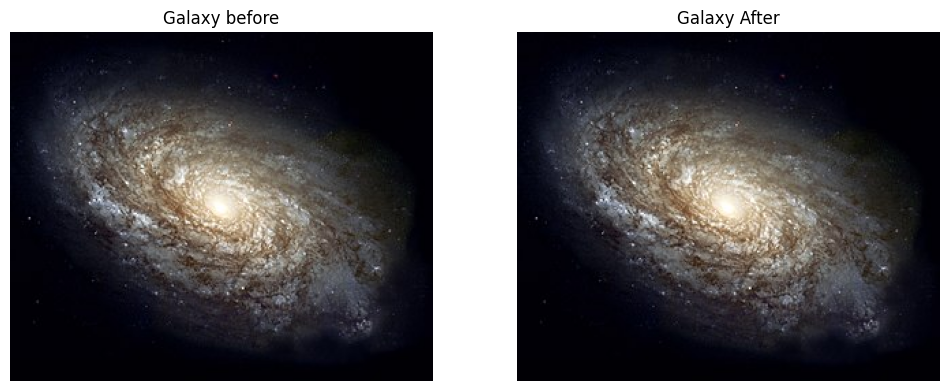

In [37]:
# membaca citra asli
original_img = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')

# membaca semua citra yang tersimpan dalam satu folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

denoised_img = np.zeros(cv_img[0].shape)
jmlGambar = 20
for i in range(jmlGambar):
  denoised_img = denoised_img + cv_img[i]
denoised_img = np.uint16(denoised_img/jmlGambar)

psnr = PSNR(original_img,denoised_img)

print('Nilai PSNR dengan 20 citra : ', psnr, ' dB')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv_img[0], cv2.COLOR_BGR2RGB))
plt.title('Galaxy before')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
plt.title('Galaxy After')
plt.axis('off')

plt.show()

Jumlah Citra 40

Nilai PSNR dengan 40 citra :  100  dB


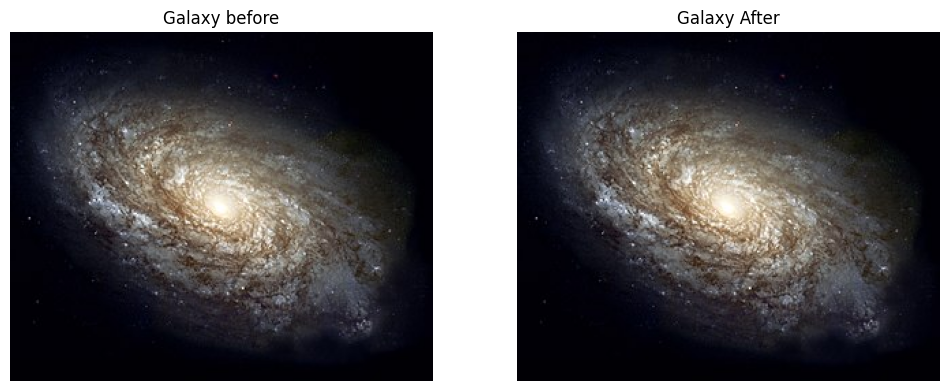

In [40]:
# membaca citra asli
original_img = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')

# membaca semua citra yang tersimpan dalam satu folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

denoised_img = np.zeros(cv_img[0].shape)
jmlGambar = 40
for i in range(jmlGambar):
  denoised_img = denoised_img + cv_img[i]
denoised_img = np.uint16(denoised_img/jmlGambar)

psnr = PSNR(original_img,denoised_img)
print('Nilai PSNR dengan 40 citra : ', psnr, ' dB')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv_img[0], cv2.COLOR_BGR2RGB))
plt.title('Galaxy before')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
plt.title('Galaxy After')
plt.axis('off')

plt.show()

Jumlah Citra 80

Nilai PSNR dengan 80 citra :  100  dB


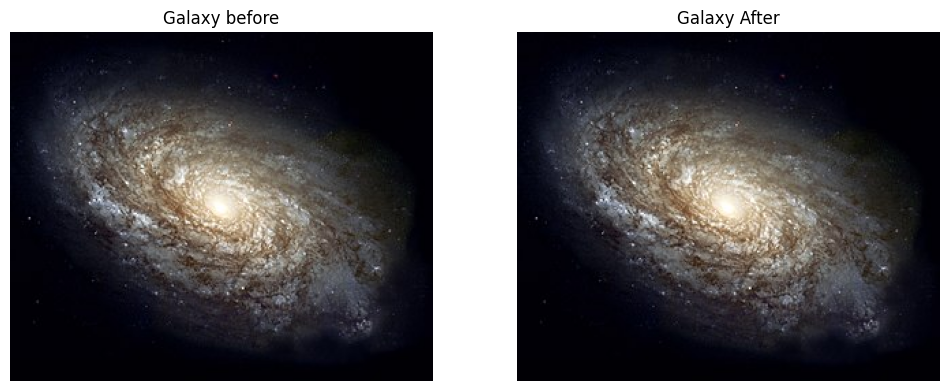

In [42]:
# membaca citra asli
original_img = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')

# membaca semua citra yang tersimpan dalam satu folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

denoised_img = np.zeros(cv_img[0].shape)
jmlGambar = 80
for i in range(jmlGambar):
  denoised_img = denoised_img + cv_img[i]
denoised_img = np.uint16(denoised_img/jmlGambar)

psnr = PSNR(original_img,denoised_img)

print('Nilai PSNR dengan 80 citra : ', psnr, ' dB')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv_img[0], cv2.COLOR_BGR2RGB))
plt.title('Galaxy before')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
plt.title('Galaxy After')
plt.axis('off')

plt.show()

Jumlah Citra 100

Nilai PSNR dengan 100 citra :  100  dB


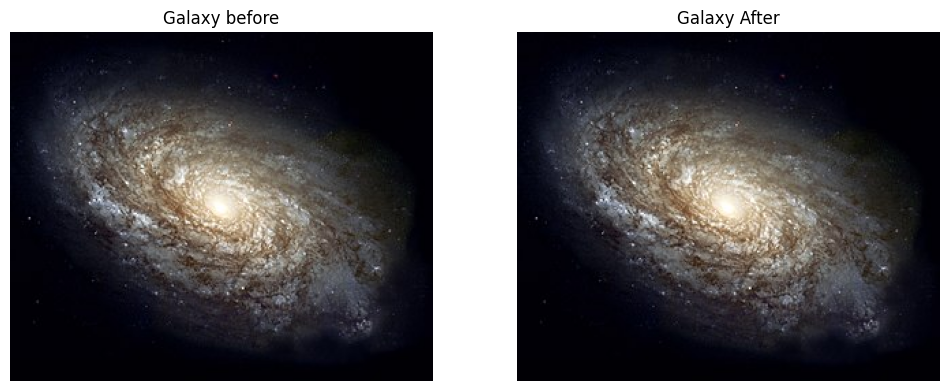

In [43]:
# membaca citra asli
original_img = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')

# membaca semua citra yang tersimpan dalam satu folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

denoised_img = np.zeros(cv_img[0].shape)
jmlGambar = 100
for i in range(jmlGambar):
  denoised_img = denoised_img + cv_img[i]
denoised_img = np.uint16(denoised_img/jmlGambar)

psnr = PSNR(original_img,denoised_img)

print('Nilai PSNR dengan 100 citra : ', psnr, ' dB')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv_img[0], cv2.COLOR_BGR2RGB))
plt.title('Galaxy before')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
plt.title('Galaxy After')
plt.axis('off')

plt.show()

**KESIMPULAN**


Semakin banyak jumlah gambar yang digunakan dalam perhitungan denoised_img, maka nilai hasil PNSR semakin tinggi. Jika nilai hasil PNSR tinggi, maka hasil gambar akan semakin jernih/bagus.

4. Buat Image Masking
- KELOMPOK 4

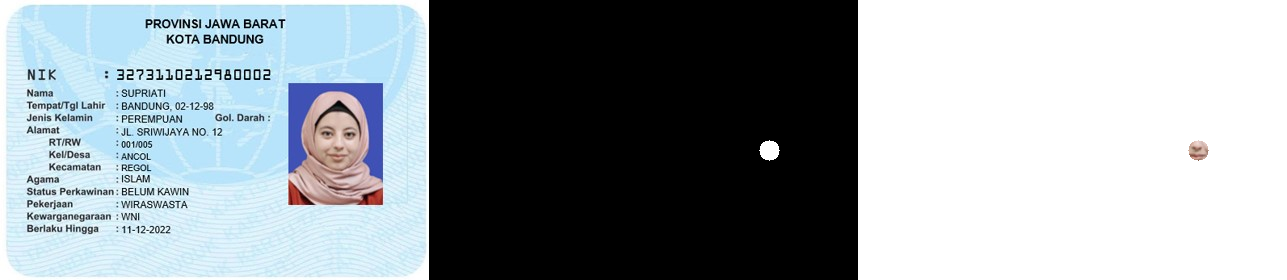

In [71]:
# menggunakan operator and
#KELOMPOK 4

img = cv.imread('/content/drive/MyDrive/PCVK/Images/contoh-foto-ktp.jpg')
mask = np.zeros(img.shape,dtype=np.uint8)
mask = cv.circle(mask, (340,150), 10, (255,255,255), -1)

result = img & mask
result[mask==0] = 255

final_frame = cv.hconcat((img,mask,result))
cv2_imshow(final_frame)

5.Image Masking
- KELOMPOK 4

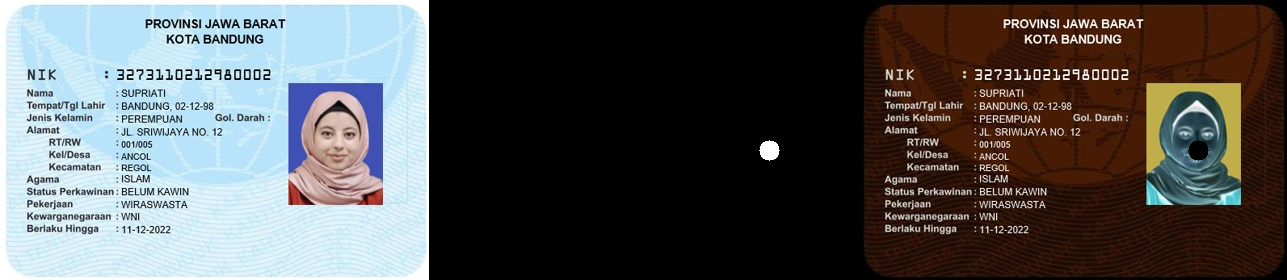

In [73]:
# menggunakan operator not
img = cv.imread('/content/drive/MyDrive/PCVK/Images/contoh-foto-ktp.jpg')
mask = np.zeros(img.shape,dtype=np.uint8)
mask = cv.circle(mask, (340,150), 10, (255,255,255), -1)


result = img & mask

masked = ~img & ~mask

final_frame = cv.hconcat((img, mask, masked))
cv2_imshow(final_frame)

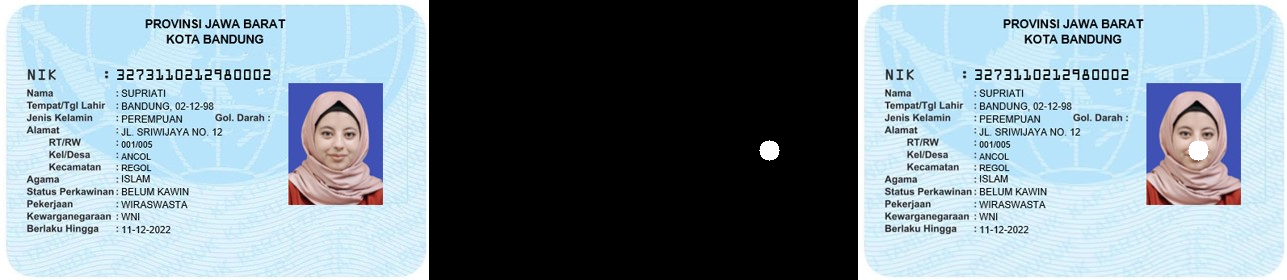

In [74]:
# menggunakan operator or

mask = np.zeros(img.shape,img.dtype)
mask = cv.circle(mask, (340,150), 10, (255,255,255), -1)

result = img & mask

masked = img | mask

final_frame = cv.hconcat((img,mask,masked))
cv2_imshow(final_frame)

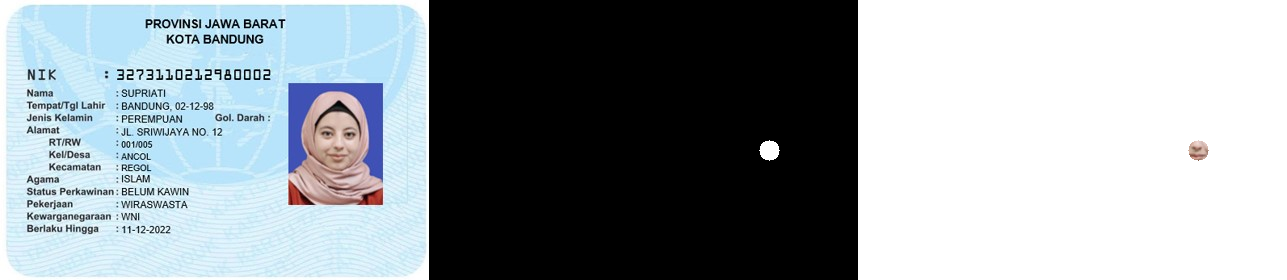

In [75]:
# menggunakan operator and

mask = np.zeros(img.shape,dtype=np.uint8)
mask = cv.circle(mask, (340,150), 10, (255,255,255), -1)

result = img & mask
result[mask==0] = 255

final_frame = cv.hconcat((img,mask,result))
cv2_imshow(final_frame)

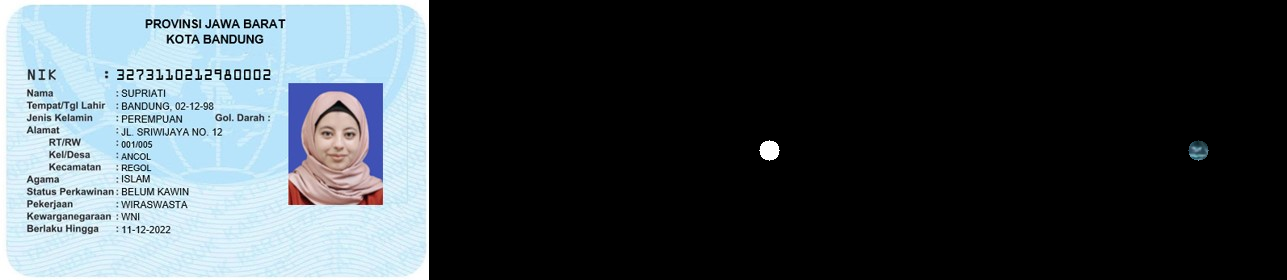

In [76]:
# menggunakan operator nand

mask = np.zeros(img.shape,dtype=np.uint8)
mask = cv.circle(mask, (340,150), 10, (255,255,255), -1)

masked = ~img & mask

final_frame = cv.hconcat((img, mask, masked))
cv2_imshow(final_frame)

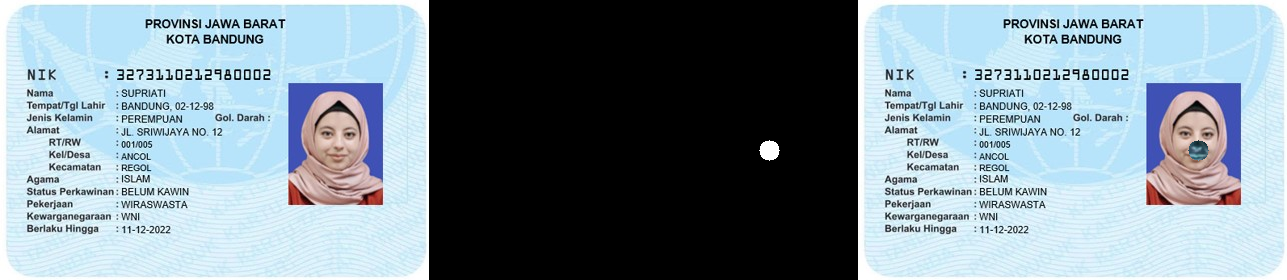

In [77]:
# menggunakan operator xor

mask = np.zeros(img.shape,dtype=np.uint8)
mask = cv.circle(mask, (340,150), 10, (255,255,255), -1)

masked = cv.bitwise_xor(img, mask)

final_frame = cv.hconcat((img, mask, masked))
cv2_imshow(final_frame)

Hasil Analisa :


  1. Image masking dapat digunakan dalam segmentasi objek. Suatu citra dapat diisolasi objeknya dan dihilangkan background-nya.

  2. Image masking dapat menggunakan operator AND, OR, NOT, NAND, dan XOR.

  3. Operator AND menampilkan piksel di area yang dibuat.

  4. Operator OR menampilkan piksel di luar area yang dibuat.

  5. Operator NOT menampilkan piksel di luar area yang dibuat serta mengubah citra menjadi negatif (inverse).

  6. Operator NAND menampilkan piksel di area yang dibua serta mengubah citra menjadi negatif (inverse).

  7. Operator XOR menampilkan seluruh piksel namun piksel di luar area yang tetap normal (original) serta piksel di luar area menjadi negatif (inverse).
